In [8]:
import pandas as pd
from dowhy import datasets
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
sim_data = datasets.linear_dataset( # Linear ?
beta=10.0, # true average causal effect
num_treatments=1,
num_instruments=2,
num_effect_modifiers=2,
num_common_causes=5,
num_frontdoor_variables=1,
num_samples=100,
)
sim_data.keys()

dict_keys(['df', 'treatment_name', 'outcome_name', 'common_causes_names', 'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 'dot_graph', 'gml_graph', 'ate'])

In [13]:
pd.DataFrame(sim_data['df']).head(3)

,FD0,X0,X1,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,3.912252,1.674751,-0.827216,1.0,0.628988,1.623015,0.681537,-0.022340,0.769445,-0.269681,True,24.646159
1,0.703449,-0.925608,0.527348,1.0,0.429337,-1.055845,-0.396054,0.043778,-0.033023,0.218608,True,-5.307814
2,1.272980,-1.951193,0.663858,0.0,0.066806,-0.342197,-0.959499,0.325385,0.869365,0.855950,True,-0.411541


In [5]:
dag = nx.parse_gml(sim_data['gml_graph']) #Graph Modeling Language (string~SMILES)
pos = {    # node positions on the plot
 'X0': (600, 350),   
 'X1': (600, 250),   
 'FD0': (300, 300),    
 'W0': (0, 400),    
 'W1': (150, 400),    
 'W2': (300, 400),    
 'W3': (450, 400),    
 'W4': (600, 400),    
 'Z0': (10, 250),    
 'Z1': (10, 350),    
 'v0': (100, 300),    
 'y': (500, 300)    
}    

In [6]:
options = {    
    "font_size": 12,    
    "node_size": 800,    
    "node_color": "white",    
    "edgecolors": "black",    
    "linewidths": 1,    
    "width": 1,    
} 

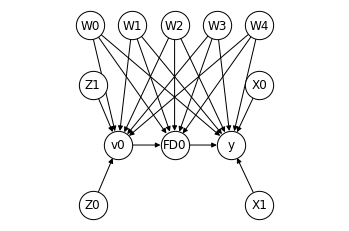

In [7]:
nx.draw_networkx(dag, pos, **options)   
ax = plt.gca()    
ax.margins(x=0.40)    
plt.axis("off")    
plt.show()